In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import pingouin as pg


In [2]:
def plotVariables(df):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.title('Temperatura x Tempo')
    plt.plot(df['Hora'], df['Temperatura'])
    plt.grid()

    plt.subplot(1, 3, 2)
    plt.title('Umidade x Tempo')
    plt.plot(df['Hora'], df['Umidade'])
    plt.grid()

    plt.subplot(1, 3, 3)
    plt.title('Alcool x Tempo')
    plt.plot(df['Hora'], df['Analogico'])
    plt.grid()
    plt.show()

def printInfo(df):
    print('temperatura média: ', np.mean(df['Temperatura']))
    print('umidade média: ', np.mean(df['Umidade']))
    print('tempo decorrido: ', df['Hora'].iloc[-1] - df['Hora'].iloc[0])

# COMPORTAMENTO IDEAL

In [3]:
filesPath = '../files/'

In [4]:
df = pd.read_csv(filesPath + 'DataBasePadrao.csv')
df

,Temperatura,Umidade,Analogico,Hora
0,46.1,38.0,4095.0,0.018535
1,46.1,38.0,4095.0,0.101508
2,46.1,38.0,4095.0,0.188028
3,46.1,38.0,4095.0,0.268063
4,46.1,38.0,4095.0,0.347665
...,...,...,...,...
34178,60.0,5.0,4095.0,2768.246853
34179,60.0,5.0,4095.0,2768.326003
34180,60.0,5.0,4095.0,2768.405316
34181,60.0,5.0,4095.0,2768.485192


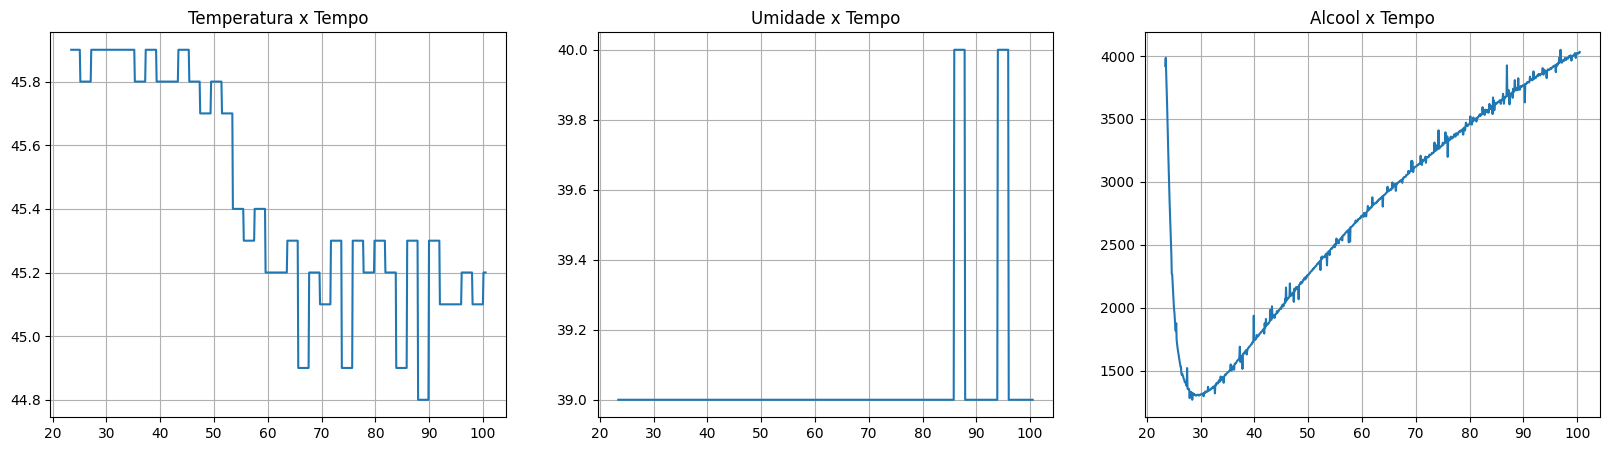

temperatura média:  45.43147368421052
umidade média:  39.05263157894737
tempo decorrido:  77.03060626983643


In [5]:
df = df.loc[(df['Analogico'] < 4095)][:950]
plotVariables(df)
printInfo(df)

# SOPRO COM ALCOOL COM ALTA UMIDADE E BAIXA TEMPERATURA

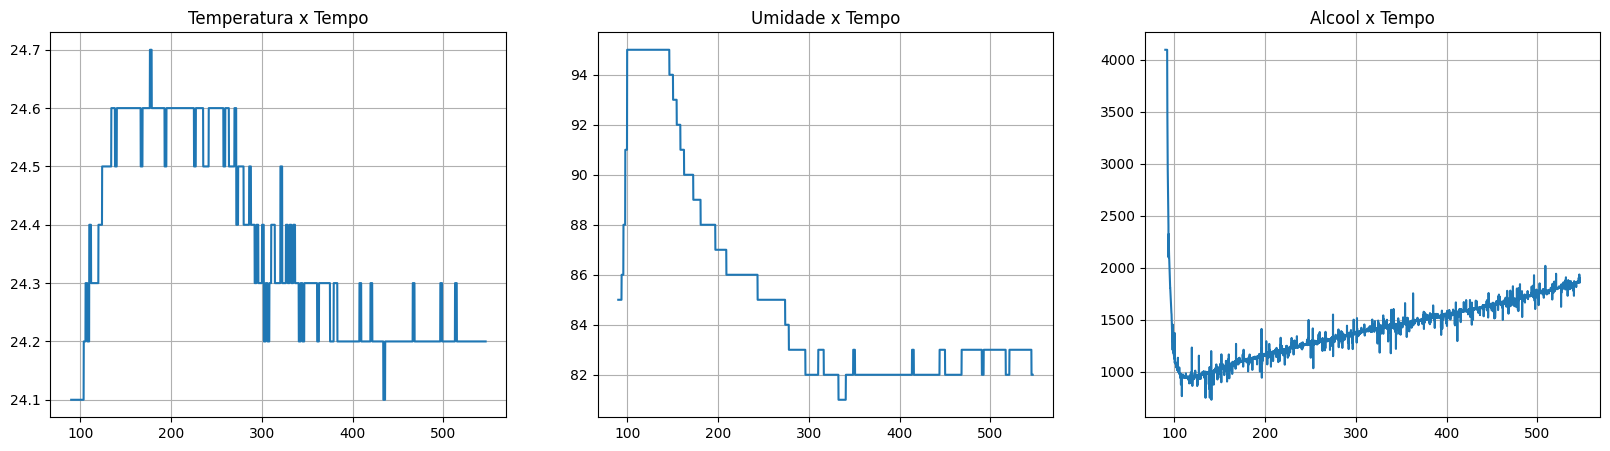

temperatura média:  24.35794608017027
umidade média:  85.185526782547
tempo decorrido:  456.58622121810913


In [6]:
df = pd.read_csv(filesPath + 'DataBaseUmid.csv')
df = df.loc[df['Sopro'] == 'SOPRANDO']

plotVariables(df)
printInfo(df)

# SOPRO COM ALCOOL COM BAIXA UMIDADE E ALTA TEMPERATURA

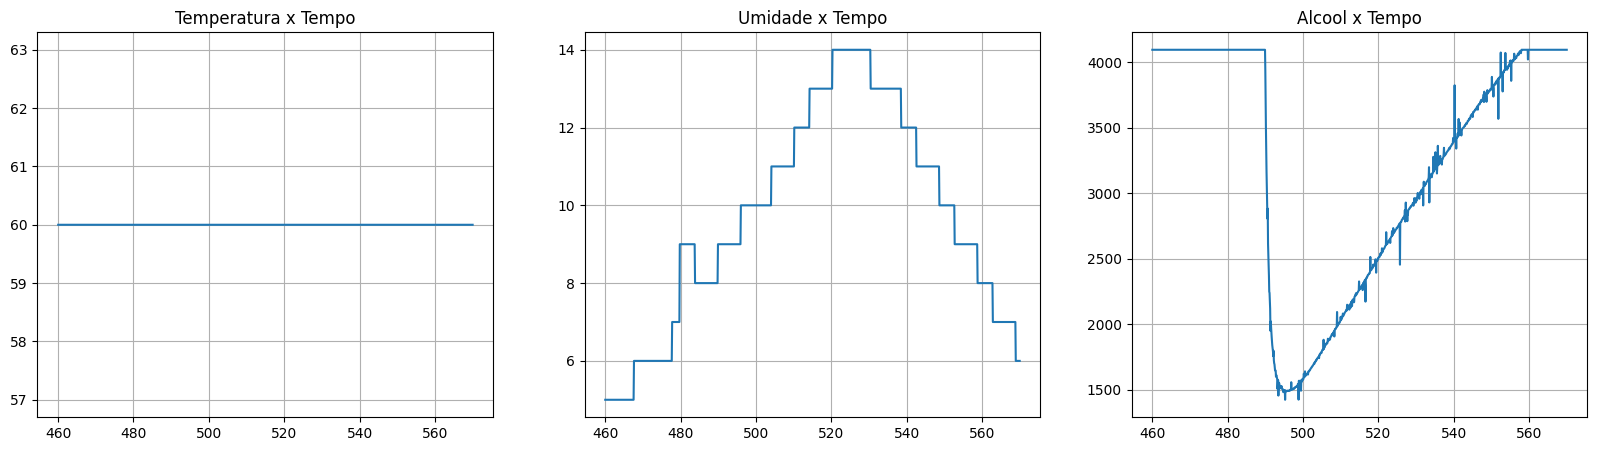

temperatura média:  60.0
umidade média:  9.704712812960235
tempo decorrido:  109.87801480293274


In [7]:
df = pd.read_csv(filesPath + 'DataBaseFinal.csv')
df = df.loc[(df['Hora'] > 460) & (df['Hora'] < 570)]

plotVariables(df)
printInfo(df)

# SOPRO SEM ALCOOL A ALTA TEMPERATURA E ALTA UMIDADE 

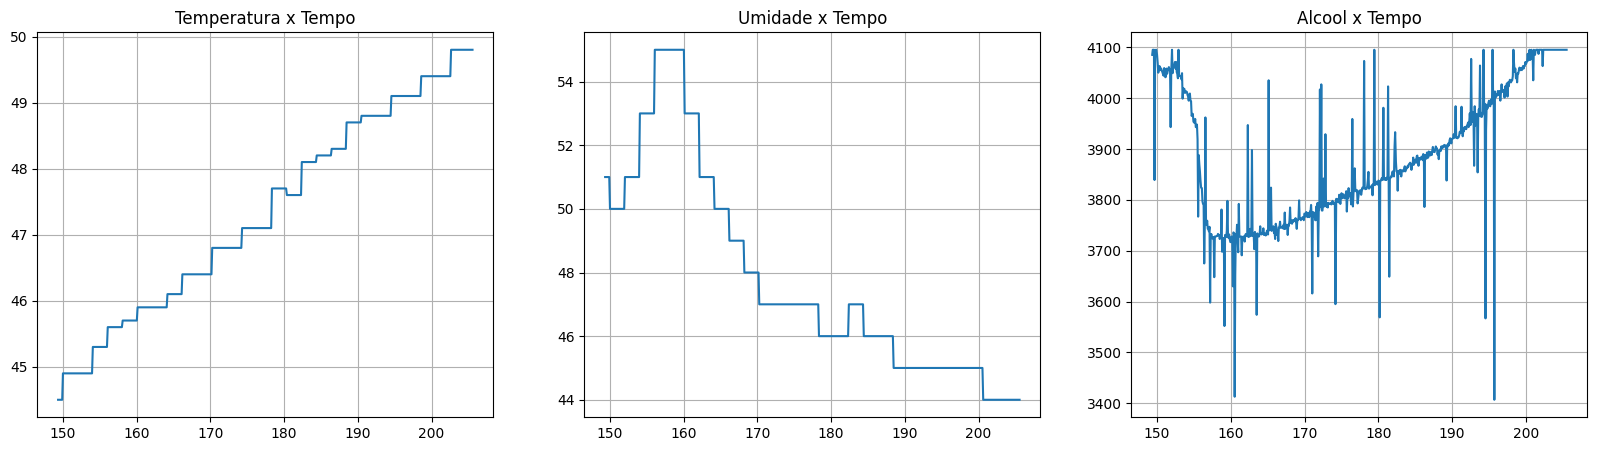

temperatura média:  47.33971223021584
umidade média:  47.82158273381295
tempo decorrido:  56.21990609169006


In [8]:
df = pd.read_csv(filesPath + 'DataBaseSopro.csv')
df = df.loc[df['Sopro'] == 'SOPRANDO']
df = df.loc[(df['Hora'] > 110) & (df['Hora'] < 210)]

plotVariables(df)
printInfo(df)

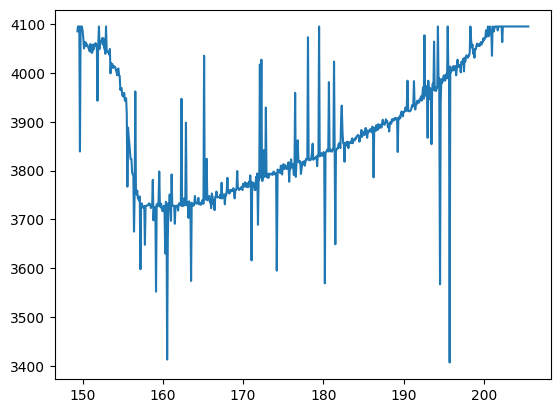

In [9]:
yData = df['Analogico'].to_numpy()
xData = df['Hora'].to_numpy()

plt.plot(xData, yData)

- APLICANDO A TRANSFORMADA DE FOURIER

(0.0, 10000.0)

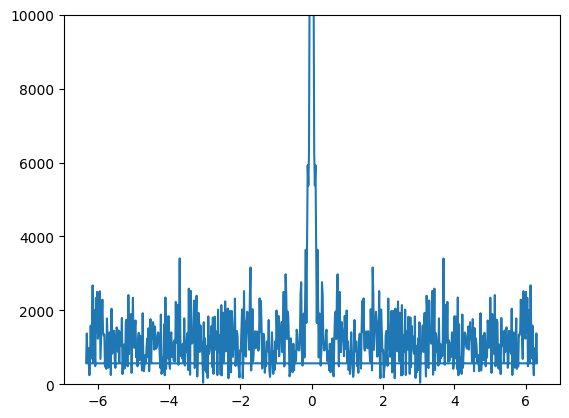

In [10]:
yFourier = np.fft.fft(yData)
xFourier = np.fft.fftfreq(len(yData), xData[1] - xData[0])

plt.plot(xFourier, np.abs(yFourier))
plt.ylim(0, 10000)

- Identificar as Frequências dos Outliers: Analise o espectro de frequências para identificar as frequências que podem corresponder aos outliers. Normalmente, isso seria feito procurando picos no espectro de frequência que estão fora do padrão do sinal principal.

- Filtro passa baixa - Filtro passa-baixa: Zera as frequências acima de 1 Hz

(0.0, 10000.0)

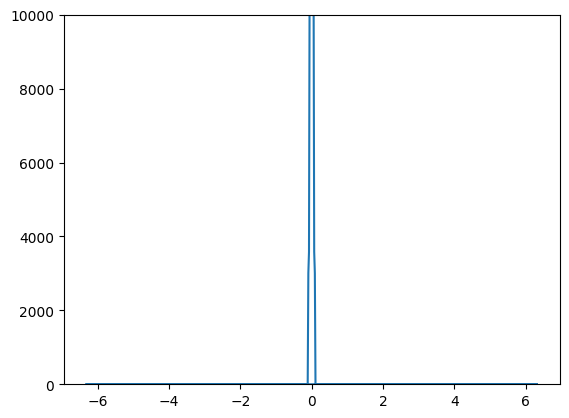

In [11]:
def passaFaixa(frequencyArray, magnitudeArray, lowerLimit, upperLimit):
    allowed = (np.abs(frequencyArray) >= lowerLimit) & (np.abs(frequencyArray) <= upperLimit)
    magnitudeArray[~allowed] = 0
    return magnitudeArray

yFiltrado = passaFaixa(xFourier, yFourier, 0, 0.1)

plt.plot(xFourier, np.abs(yFiltrado.real))
plt.ylim(0, 10000)

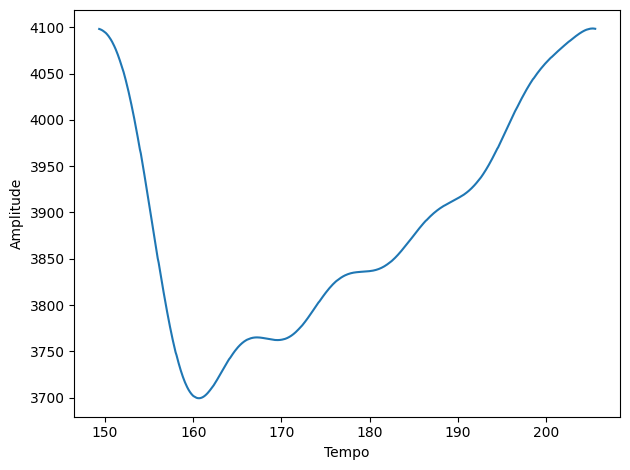

In [12]:
yData = np.fft.ifft(yFiltrado)
plt.plot(xData, yData.real)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# VARIAÇÃO DA TEMPERATURA SEM SOPRO
- Diminuindo a temperatura de 60ºC até 30ºC aumentando a umidade

In [13]:
df = pd.read_csv(filesPath + 'DataBaseTemp.csv')[900:]
df = df.loc[df['Hora'] < 500]

target = df.loc[(df['Analogico'] < 4095)]

temperatura média:  39.69480371704912
umidade média:  44.97117390479803
tempo decorrido:  427.031129360199


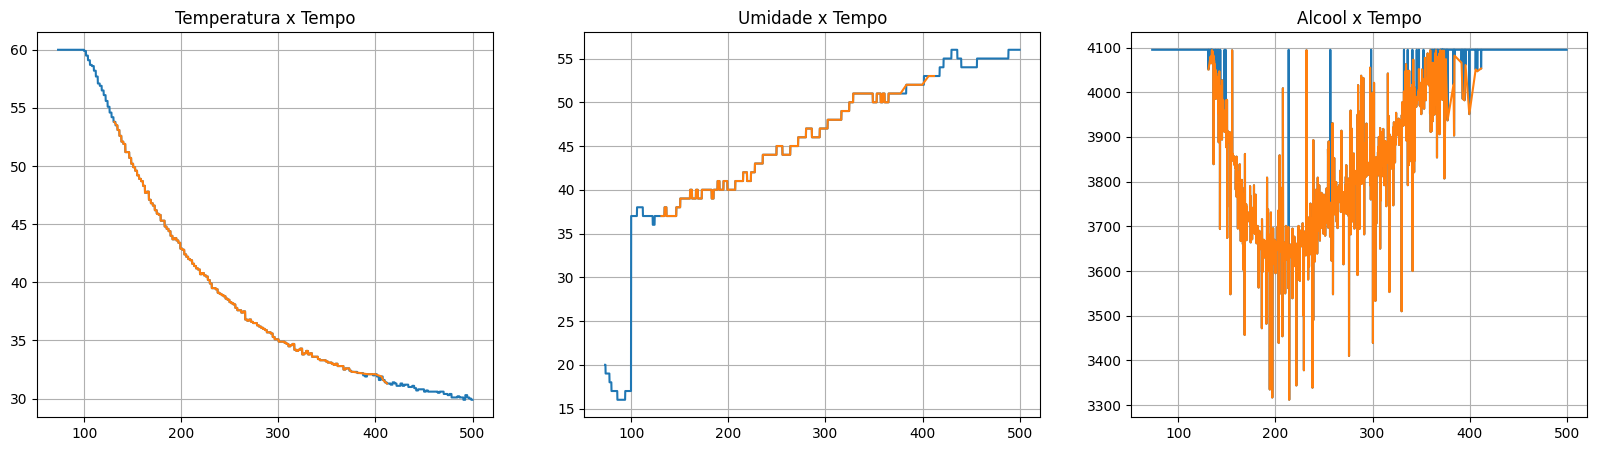

In [14]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('Temperatura x Tempo')
plt.plot(df['Hora'], df['Temperatura'])
plt.plot(target['Hora'], target['Temperatura'])
plt.grid()

plt.subplot(1, 3, 2)
plt.title('Umidade x Tempo')
plt.plot(df['Hora'], df['Umidade'])
plt.plot(target['Hora'], target['Umidade'])
plt.grid()

plt.subplot(1, 3, 3)
plt.title('Alcool x Tempo')
plt.plot(df['Hora'], df['Analogico'])
plt.plot(target['Hora'], target['Analogico'])
plt.grid()

print('temperatura média: ', np.mean(df['Temperatura']))
print('umidade média: ', np.mean(df['Umidade']))
print('tempo decorrido: ', df['Hora'].iloc[-1] - df['Hora'].iloc[0])


# CORRELAÇÃO MULTIVARIÁVEL
Fórmula da correlação de Pearson

- $n$ é o número de observações na sua amostra. No seu caso, 695 significa que você tem 695 observações.

- $r$ é o coeficiente de correlação parcial, que mede a força e a direção da relação linear entre as duas variáveis, controlando para a(s) variável(is) de controle. O valor de r varia de -1 a 1. Um valor de 0.080618 sugere uma correlação positiva muito fraca entre "Temperatura" e "Analogico", controlando para "Umidade".

- $CI95\%$ representa o intervalo de confiança de 95% para o coeficiente de correlação. Isso significa que você pode estar 95% confiante de que o coeficiente de correlação verdadeiro está entre 0.01 e 0.15. Isso sugere uma correlação positiva, mas possivelmente muito fraca, entre as variáveis de interesse.

- $p-val$ é o valor-p, que é um indicador da evidência contra uma hipótese nula. A hipótese nula, neste caso, seria que não há correlação entre "Temperatura" e "Analogico", controlando para "Umidade". Um valor-p abaixo de 0.05 geralmente é considerado evidência suficiente para rejeitar a hipótese nula, sugerindo que há alguma correlação entre as variáveis. O seu valor-p de 0.03372 está abaixo do limite de 0.05, então você rejeitaria a hipótese nula de não correlação.

In [15]:
correlacao_parcial = pg.partial_corr(data=target, x='Temperatura', y='Analogico')
print('Temperatura x Analógico (Desconsiderando a Umidade)')
print(correlacao_parcial)
print('\n')

correlacao_parcial = pg.partial_corr(data=target, x='Temperatura', y='Analogico', covar=['Umidade'])
print('Temperatura x Analógico (Considerando a Umidade)')
print(correlacao_parcial)
print('\n')

correlacao_parcial = pg.partial_corr(data=target, x='Umidade', y='Analogico')
print('Umidade x Analógico (Desconsiderando a Temperatura)')
print(correlacao_parcial)
print('\n')

correlacao_parcial = pg.partial_corr(data=target, x='Umidade', y='Analogico', covar=['Temperatura'])
print('Umidade x Analógico (Considerando a Temperatura)')
print(correlacao_parcial)
print('\n')

Temperatura x Analógico (Desconsiderando a Umidade)
            n         r          CI95%         p-val
pearson  2927 -0.269223  [-0.3, -0.24]  8.840518e-50


Temperatura x Analógico (Considerando a Umidade)
            n         r         CI95%  p-val
pearson  2927  0.756519  [0.74, 0.77]    0.0


Umidade x Analógico (Desconsiderando a Temperatura)
            n         r         CI95%          p-val
pearson  2927  0.503133  [0.48, 0.53]  1.193023e-187


Umidade x Analógico (Considerando a Temperatura)
            n         r        CI95%  p-val
pearson  2927  0.809707  [0.8, 0.82]    0.0




# MODELO PREDITIVO

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sympy as sp

In [17]:
def getLinearCoeficients(xDados, yDados):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xDados, yDados, test_size=.25)
    regressaoLinear = LinearRegression()
    regressaoLinear.fit(xTreino, yTreino)
    return regressaoLinear.coef_, regressaoLinear.intercept_

def predictLinear(x, a, b):
    total = 0
    for c in range(0, len(x)):
        total += x[c]*a[c] # y=a1⋅x1+a2⋅x2+a3⋅x3+...+b
    return total + b

def sympyFunction(a, b):
    total = 0
    for c in range(0, len(a)):
        total += sp.var(f'x_{c+1}')*a[c] # y=a1⋅x1+a2⋅x2+a3⋅x3+...+b
    return total + b

def getLinearPrecision(xDados, yDados):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xDados, yDados, test_size=.25)
    regressaoLinear = LinearRegression()
    regressaoLinear.fit(xTreino, yTreino)
    yLinear = regressaoLinear.predict(xTeste)
    return metrics.r2_score(yTeste, yLinear) * 100

In [18]:
xDados = target[['Temperatura', 'Umidade']]
yDados = target['Analogico']

print(f'Probabilidade por Regressão Linear: {getLinearPrecision(xDados, yDados):.2f} %', )
a, b = getLinearCoeficients(xDados, yDados)
f = sympyFunction(a, b)
print(f)

Probabilidade por Regressão Linear: 67.00 %
48.542315478443*x_1 + 75.2224060439732*x_2 - 1449.96676901312


In [19]:
def getValue(x_1, x_2):
    return 48.3960928909568*x_1 + 75.1383995655682*x_2 - 1440.72921072007

target['TesteAnalogico'] = target.apply(lambda x: getValue(x['Temperatura'], x['Umidade']), axis=1)
target

C:\Users\march\AppData\Local\Temp\ipykernel_3208\3960956945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['TesteAnalogico'] = target.apply(lambda x: getValue(x['Temperatura'], x['Umidade']), axis=1)


,Temperatura,Umidade,Analogico,Hora,Sopro,TesteAnalogico
1616,53.8,37.0,4051.0,130.963553,SEM SOPRO,3943.101371
1643,53.5,37.0,4080.0,133.148982,SEM SOPRO,3928.582543
1644,53.5,37.0,4065.0,133.228559,SEM SOPRO,3928.582543
1654,53.5,37.0,4065.0,134.029143,SEM SOPRO,3928.582543
1658,53.1,38.0,4092.0,134.375137,SEM SOPRO,3984.362505
...,...,...,...,...,...,...
4886,32.1,52.0,4061.0,395.839072,SEM SOPRO,4019.982148
4934,32.1,52.0,3951.0,399.727858,SEM SOPRO,4019.982148
5015,31.9,53.0,4051.0,406.283886,SEM SOPRO,4085.441329
5035,31.6,53.0,4047.0,407.907956,SEM SOPRO,4070.922502


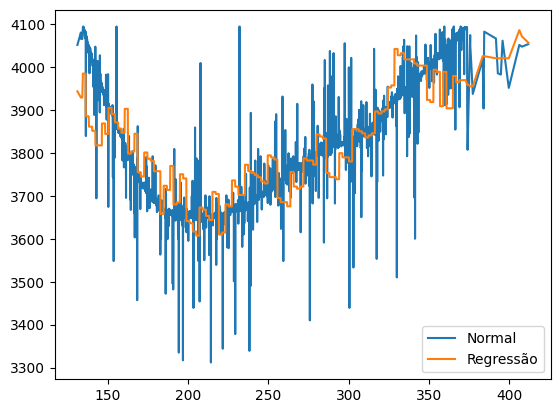

In [20]:
plt.plot(target['Hora'], target['Analogico'], label='Normal')
plt.plot(target['Hora'], target['TesteAnalogico'], label='Regressão')
plt.legend()

In [21]:
xDados = target[['Temperatura', 'Umidade']]
yDados = target['Analogico']

print(f'Probabilidade por Regressão Linear: {getLinearPrecision(xDados, yDados):.2f} %', )
a, b = getLinearCoeficients(xDados, yDados)
f = sympyFunction(a, b)
print(f)

Probabilidade por Regressão Linear: 71.12 %
48.7051735380083*x_1 + 75.7721349167765*x_2 - 1481.98491775339
